# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">7. Integration and Final Predictions</h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546   |

---

### **8. Integration and Final Predictions Notebook**  
**Description:**  
This notebook integrates and compares the results of both **hierarchical classification** and **flat classification** approaches to produce the final outputs and evaluate the entire pipeline.  

Key steps include:  
- **Combining Predictions:** Merge outputs from both approaches to enable a side-by-side comparison.  
- **Performance Evaluation:** Compare flat and hierarchical models using metrics such as accuracy, F1-score, precision, recall, and confusion matrices.  
- **Analysis:** Discuss the advantages, disadvantages, and trade-offs of each approach. Highlight scenarios where one approach outperforms the other.  
- **Output:** Save the final predictions from both approaches for deployment, further reporting, or stakeholder presentation.  

This notebook serves as the final step in the pipeline, providing a detailed evaluation of the two modeling strategies and ensuring clarity on their relative performance and practical implications.  

---


## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Final Hierarchical Modeling Predictions](#chapter2)
* [3. Performance Evaluation](#chapter3)


# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>
[Back to ToC](#toc)<br>

In [3]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

# 2. Final Hierarchical Modeling Predictions <a class="anchor" id="chapter2"></a>
[Back to ToC](#toc)<br>

In this section, we will load the final `df_test` containing the predictions, perform basic visualizations of the predicted test targets, and prepare the results for submission to Kaggle.

In [20]:
X_test_final_combined = pd.read_csv("../processed_datasets/df_test_predictions_not5.csv", index_col="Claim Identifier")

In [21]:
X_test_final_combined.head()

,Age at Injury,IME-4 Count,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,promptness_C3_category,...,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq,Pred_notebook_5
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,19,0.0,3,4,2022,5,3,3,3,5,...,31684,216798,25490,88312,9326,7246.0,96343,404174,228492,2. NON-COMP
6166141,19,0.0,1,4,2022,6,3,0,0,5,...,46587,216798,14632,88312,6322,8907.0,45491,404174,228492,4. TEMPORARY
6165907,59,0.0,2,4,2022,0,0,7,7,5,...,20637,216798,8659,44601,929,149.0,80866,404174,228492,4. TEMPORARY
6166047,42,0.0,3,4,2022,2,2,7,7,5,...,46587,216798,9604,88312,38469,11544.0,96343,404174,228492,2. NON-COMP
6166102,25,0.0,3,4,2022,1,3,3,3,5,...,42680,216798,9935,37603,9984,10237.0,142559,404174,228492,4. TEMPORARY


Let's create a simple plot to visualize the value counts of the predicted target variable from the df_test dataset.

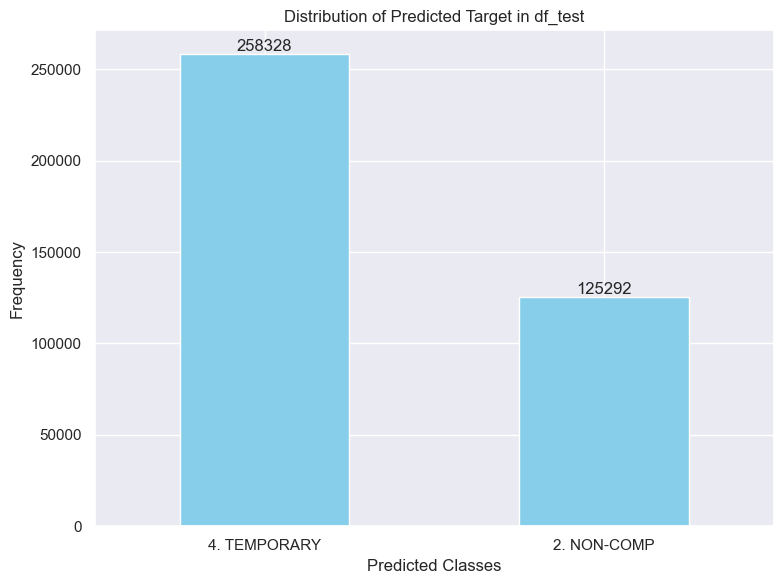

In [25]:
value_counts = X_test_final_combined['Pred_notebook_5'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
bars = value_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Predicted Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Target in df_test')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Add count value above each bar
for bar in bars.patches:
    height = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{int(height)}', 
             ha='center', va='bottom')  # Position the count value above the bar

# Show the plot
plt.tight_layout()
plt.show()


To prepare the final dataset for submission, we will rename the column Pred_notebook_5 to 'Claim Injury Type' and save the dataset to a CSV file without including the index.

In [9]:
# Rename the column
X_test_final_combined.rename(columns={'Pred_notebook_5': 'Claim Injury Type'}, inplace=True)

# Save to CSV without including the index
X_test_final_combined.to_csv('submission.csv', index=False)

# 3. Performance Evaluation <a class="anchor" id="chapter3"></a>
[Back to ToC](#toc)<br>

In this section, we will plot graphs to compare the overall macro F1 score on both the training and validation sets for our approach. First, we will visualize the F1 scores from our hierarchical modeling across different levels (from notebooks 4, 5, and 6), calculate the average score, and then compute the F1 score for the flat model.

#ADD NOTEBOOK 6 SCORE

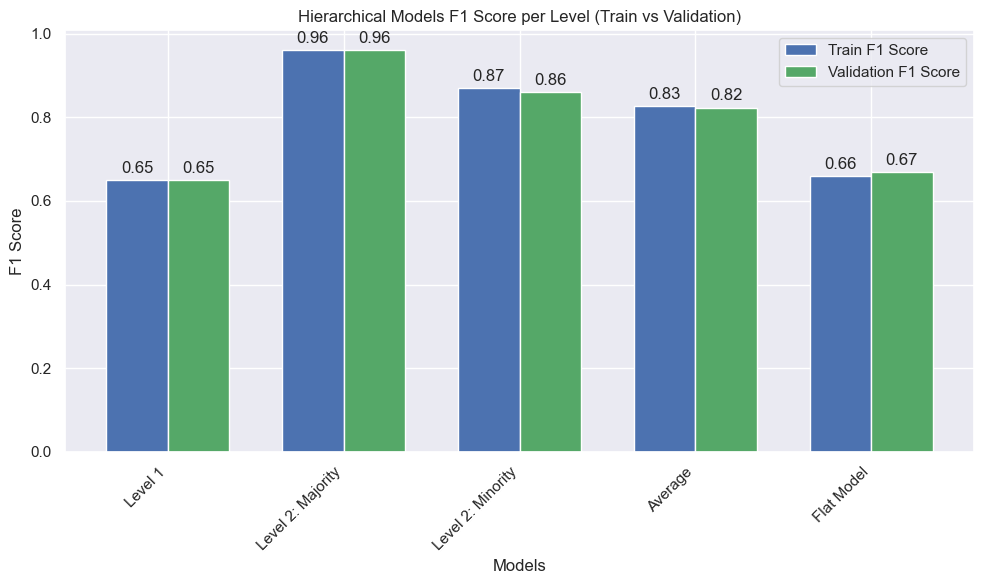

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ["Level 1", "Level 2: Majority", "Level 2: Minority", "Average", "Flat Model"]
train_f1_scores = [0.65, 0.96, 0.87, np.mean([0.65, 0.96, 0.87]), 0.66]  # Adding average and Flat Model
val_f1_scores = [0.65, 0.96, 0.86, np.mean([0.65, 0.96, 0.86]), 0.67]  # Adding average and Flat Model

# Bar width and positions
bar_width = 0.35
x = np.arange(len(labels))  # X positions for the bars

# Plot for hierarchical models
plt.figure(figsize=(10, 6))
train_bars = plt.bar(x - bar_width/2, train_f1_scores, bar_width, color='b', label='Train F1 Score')
val_bars = plt.bar(x + bar_width/2, val_f1_scores, bar_width, color='g', label='Validation F1 Score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Hierarchical Models F1 Score per Level (Train vs Validation)')
plt.xticks(x, labels, rotation=45, ha='right')  # Add model labels on x-axis
plt.legend()

# Add F1 score values above the bars for train
for bar in train_bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

# Add F1 score values above the bars for validation
for bar in val_bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

# Adjust layout and show plot
plt.tight_layout()  # Adjust layout to prevent text overlap
plt.show()

The second plot compares the performance of both the hierarchical and flat models as evaluated on Kaggle. Here, we display separate scores for both the training and validation sets.

- **Kaggle Performance**: The plot shows the performance of the models when tested on Kaggle, allowing us to compare how well the models generalize to unseen data.

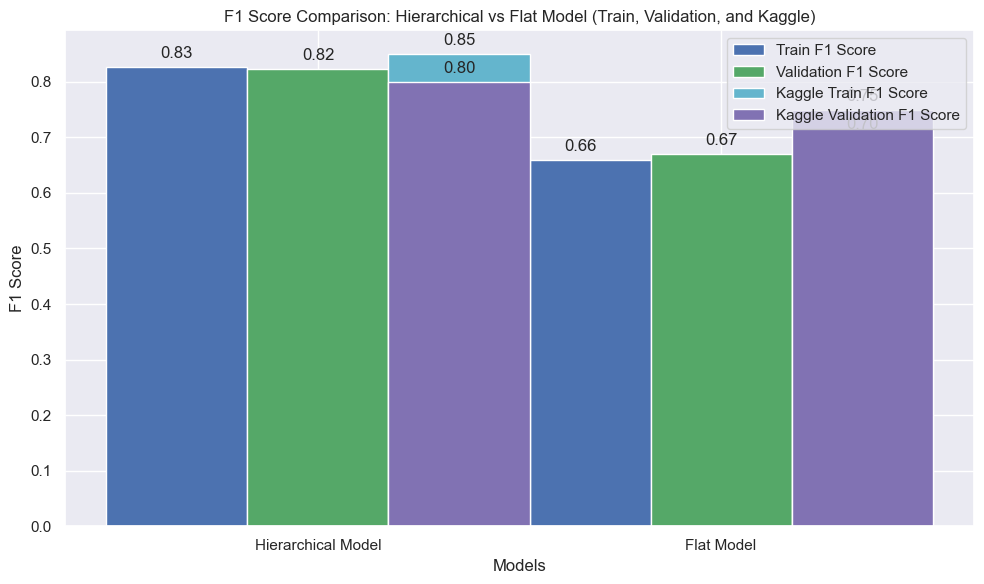

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Hierarchical Model (Train and Validation)
hierarchical_train_scores = [0.65, 0.96, 0.87]  # Example train F1 scores
hierarchical_val_scores = [0.65, 0.96, 0.86]  # Example validation F1 scores

# Data for Flat Model (Train and Validation)
flat_train_score = 0.66
flat_val_score = 0.67

# Calculate average validation F1 score for Hierarchical model
average_hierarchical_val_score = np.mean(hierarchical_val_scores)

# Data for Kaggle (Train and Validation)
kaggle_train_scores = [0.85, 0.70]  # Fake Kaggle scores for training (Hierarchical, Flat)
kaggle_val_scores = [0.80, 0.75]  # Fake Kaggle scores for validation (Hierarchical, Flat)

# Labels for the models
labels = ["Hierarchical Model", "Flat Model"]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(labels))  # X positions for the bars

# Plot for Hierarchical and Flat Model performance
plt.figure(figsize=(10, 6))

# Plot train and validation bars for Hierarchical and Flat models
train_bars = plt.bar(x - bar_width/2, [np.mean(hierarchical_train_scores), flat_train_score], bar_width, color='b', label='Train F1 Score')
val_bars = plt.bar(x + bar_width/2, [average_hierarchical_val_score, flat_val_score], bar_width, color='g', label='Validation F1 Score')

# Plot for Kaggle performance
kaggle_bars_train = plt.bar(x + bar_width*1.5, kaggle_train_scores, bar_width, color='c', label='Kaggle Train F1 Score')
kaggle_bars_val = plt.bar(x + bar_width*1.5, kaggle_val_scores, bar_width, color='m', label='Kaggle Validation F1 Score')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: Hierarchical vs Flat Model (Train, Validation, and Kaggle)')
plt.xticks(x + bar_width/2, labels)  # Add model labels on x-axis
plt.legend()

# Add F1 score values above the bars for train
for bar in train_bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

# Add F1 score values above the bars for validation
for bar in val_bars:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

# Add F1 score values above the bars for Kaggle
for bar in kaggle_bars_train:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

for bar in kaggle_bars_val:
    yval = bar.get_height()  # Get the height of each bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')  # Position text above the bar

# Adjust layout and show plot
plt.tight_layout()  # Adjust layout to prevent text overlap
plt.show()

### Conclusions: